In [1]:
# !pip install keras tensorflow
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [4]:


# Preprocess data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/santannajj/Desktop/ml_ocr_chatgpt_me/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print data details before preprocessing
print("Before preprocessing:")
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape input data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print data details after preprocessing
print("\nAfter preprocessing:")
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
batch_size = 128
epochs = 10

try:
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                        validation_split=0.1, verbose=1)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest accuracy: {test_accuracy:.4f}")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Shapes after attempted fit:")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")

Before preprocessing:
X_train shape: (60000, 28, 28), dtype: uint8
y_train shape: (60000,), dtype: uint8

After preprocessing:
X_train shape: (60000, 784), dtype: float32
y_train shape: (60000, 10), dtype: float64
Epoch 1/10


/Users/santannajj/Desktop/ml_ocr_chatgpt_me/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.8237 - loss: 0.6285 - val_accuracy: 0.9568 - val_loss: 0.1491
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9537 - loss: 0.1566 - val_accuracy: 0.9710 - val_loss: 0.1007
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.9697 - loss: 0.1015 - val_accuracy: 0.9748 - val_loss: 0.0916
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.9774 - loss: 0.0755 - val_accuracy: 0.9748 - val_loss: 0.0797
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9822 - loss: 0.0590 - val_accuracy: 0.9755 - val_loss: 0.0812
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9865 - loss: 0.0463 - val_accuracy: 0.9765 - val_loss: 0.0805
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9885 - loss: 0.0381 - val_accuracy: 0.9788 - val_loss: 0.0733
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.9915 - loss: 0.0288 - val_accurac

In [9]:
# !pip install matplotlib

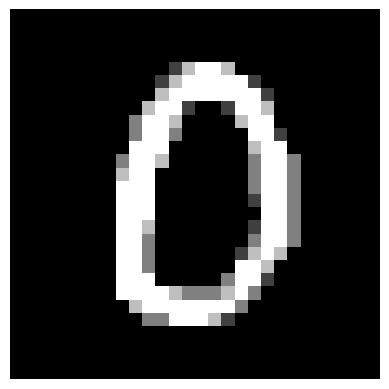

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select a sample
sample_index = np.random.randint(0, len(X_test))

sample_image = X_test[sample_index]
sample_label = y_test[sample_index]

# Reshape the sample image for prediction
sample_image = sample_image.reshape(1, 28, 28, 1)

plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [35]:
# The ACTUAL prediction of the sample image
sample_image_reshaped = sample_image.reshape(1, 784)  # Reshape to match the expected input shape
prediction = model.predict(sample_image_reshaped)
predicted_label = np.argmax(prediction)

# !pip install gtts
from gtts import gTTS  # Google Text to Speech
from IPython.display import display, HTML, Audio

# Generate HTML with colored predicted label
html = f"<div style='font-size: 64px; font-weight: bold; color: #FF0000; text-shadow: 2px 2px 4px #CCCCCC; margin: 20px;'>This is the number: {predicted_label}</div>"
html = f"<img src='blob:https://www.bing.com/3e6ffbb5-d19c-42dc-8349-be4676769b7a' alt='bot'>" + html
display(HTML(html))

# Text to Speech
tts = gTTS("This is the number" + str(predicted_label))
tts.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
